In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import os

**QUESTION 1**

In [2]:
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: C:\Users\Shao Xuan Luo


In [3]:
# Change working directory to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
os.chdir(desktop_path)

print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Shao Xuan Luo\Desktop


In [4]:
data = pd.read_csv("CC_Default.csv")

print("\nFirst 5 records:\n", data.head())

print("\nShape of dataset (rows, columns):", data.shape)


First 5 records:
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0    

In [5]:
display(data.describe())

display(data.info())

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

None

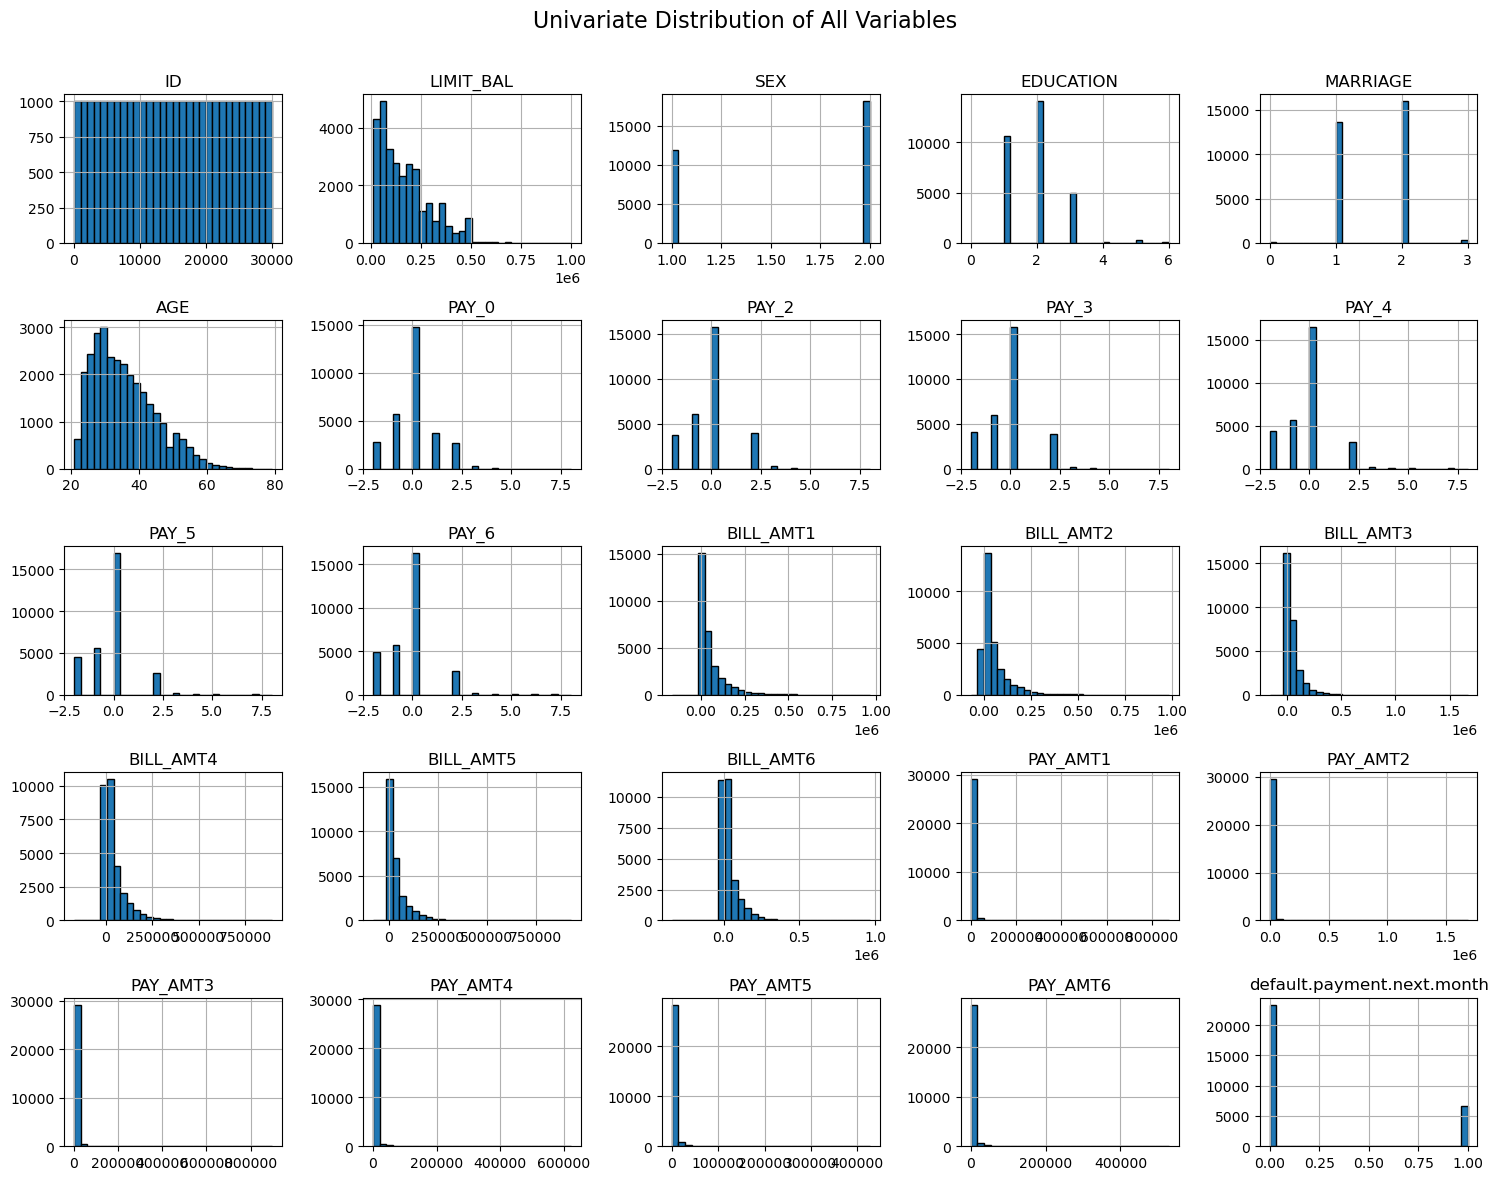

In [6]:
data.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Univariate Distribution of All Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Observations:
1. Gender - There is a higher propertion of female to males.
2. Education wise - The customers are clustered around graduate school, univeristy, and high school.
3. Marriage - There is a slightly higher proportion of singles to married couples.
4. Default payment next month - The dataset is overwhelmingly leaning towards non-default customers than default customers.

In [10]:
# List of attributes to convert
categorical_vars = ["SEX", "EDUCATION", "MARRIAGE", 
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Convert to categorical
for col in categorical_vars:
    data[col] = data[col].astype("category")

# Verify changes
print(data[categorical_vars].dtypes)

# Optional: check unique categories
for col in categorical_vars:
    print(f"\n{col} categories: {data[col].cat.categories}")

SEX          category
EDUCATION    category
MARRIAGE     category
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
dtype: object

SEX categories: Index([1, 2], dtype='int64')

EDUCATION categories: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

MARRIAGE categories: Index([0, 1, 2, 3], dtype='int64')

PAY_0 categories: Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

PAY_2 categories: Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

PAY_3 categories: Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

PAY_4 categories: Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

PAY_5 categories: Index([-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

PAY_6 categories: Index([-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], dtype='int64')


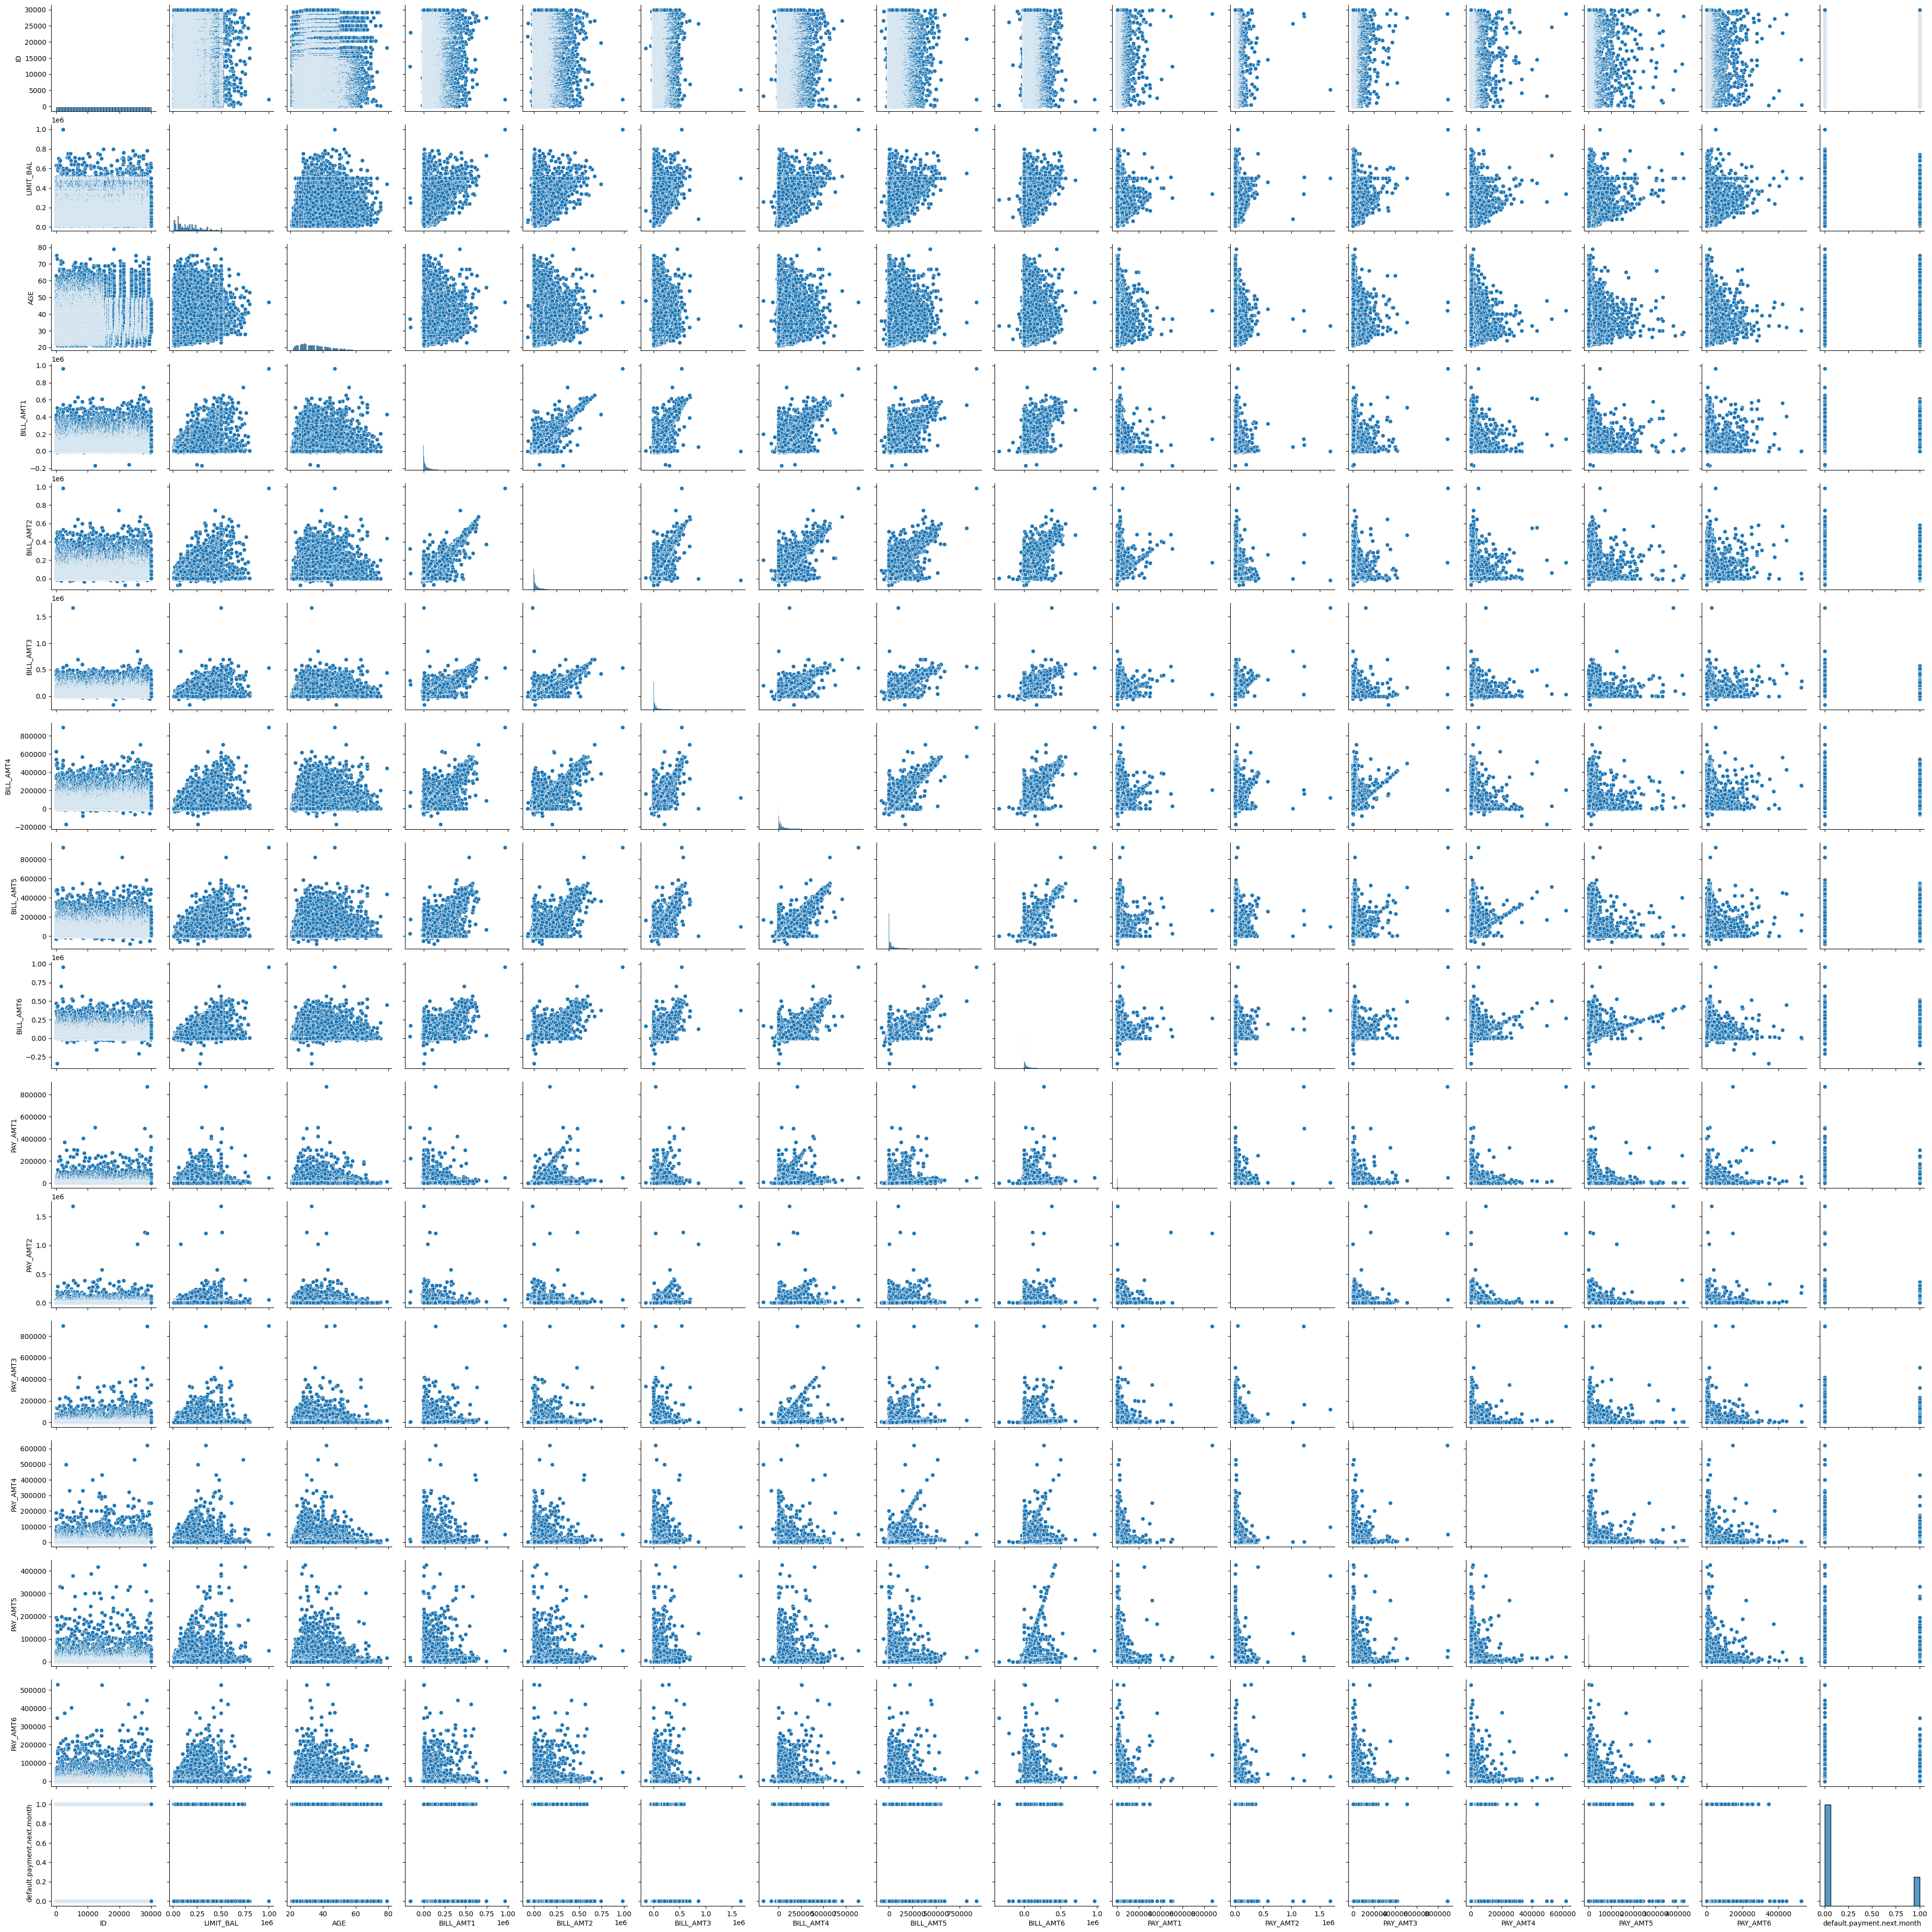

In [11]:
# Scatterplot matrix for all variables
sns.pairplot(data, diag_kind="hist")  
plt.show()

Observations:
1. There is significant, positive and linear correlationship between BILL_4, BILL_5 and BILL_6, suggesting that credit card customers are habitual creatures - high bills in previous month would mean a tendency for high bills in the subsequent month.

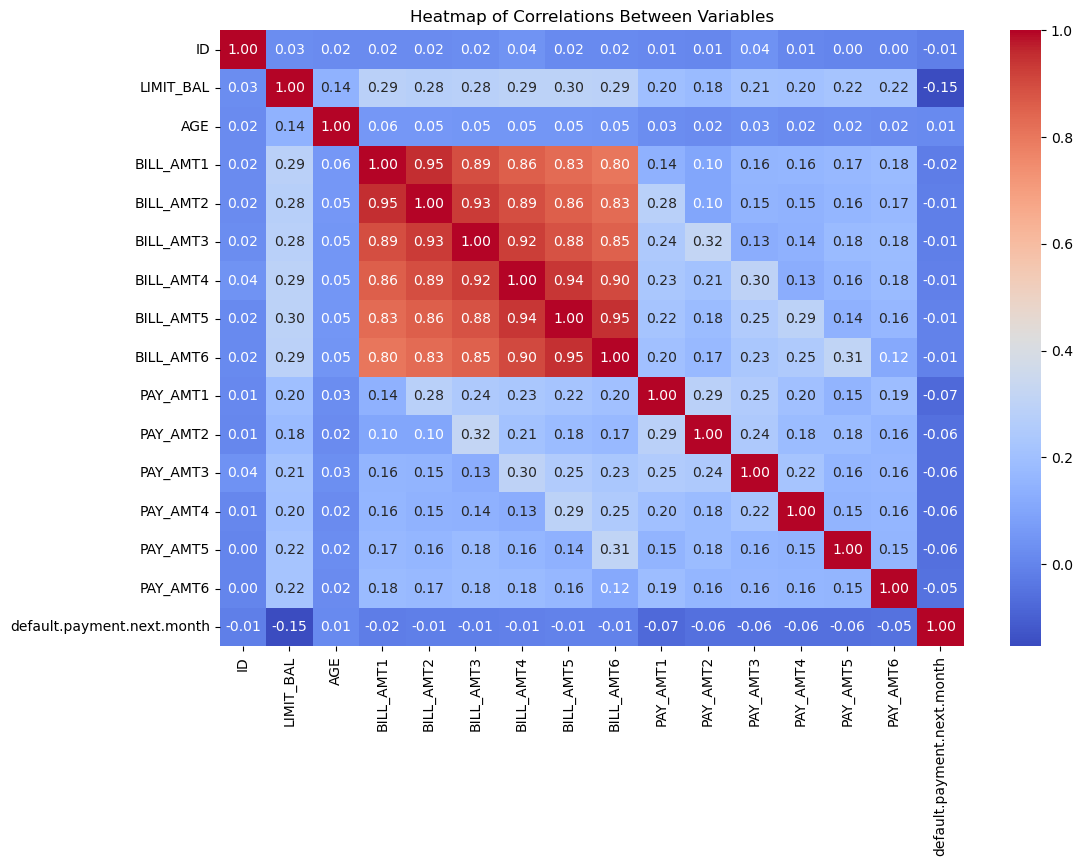

In [12]:
# Compute correlation matrix
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlations Between Variables")
plt.show()

Observations:
1. Heatmap reinforces our earlier observation, as we can see from the dark red region that BILL_4, BILL_5 and BILL_6 are indeed strongly correlated.

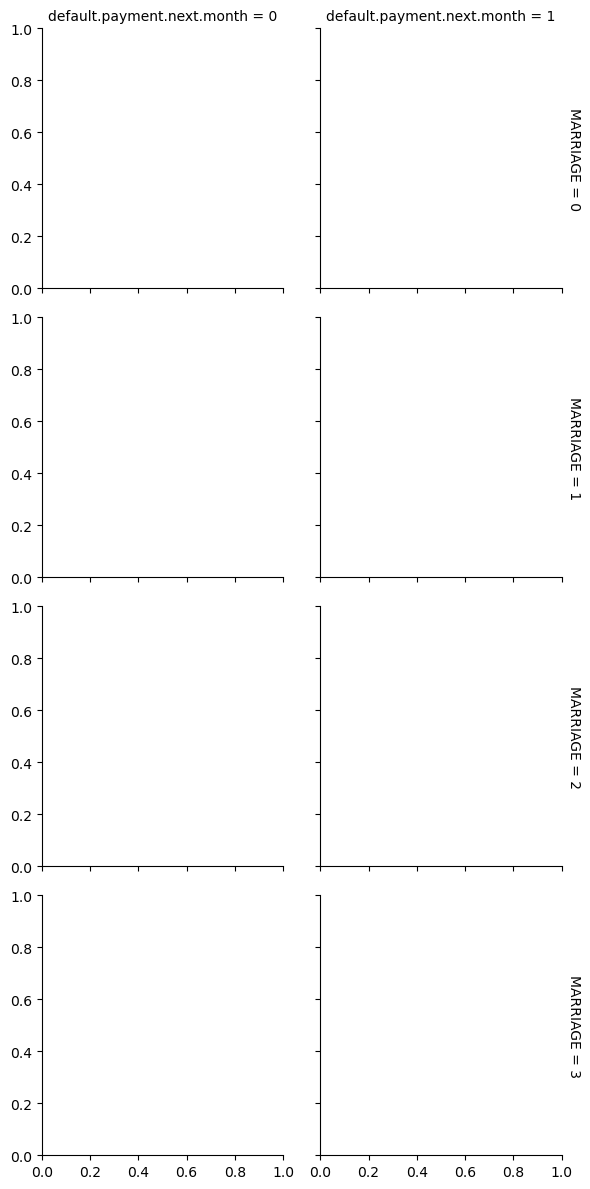

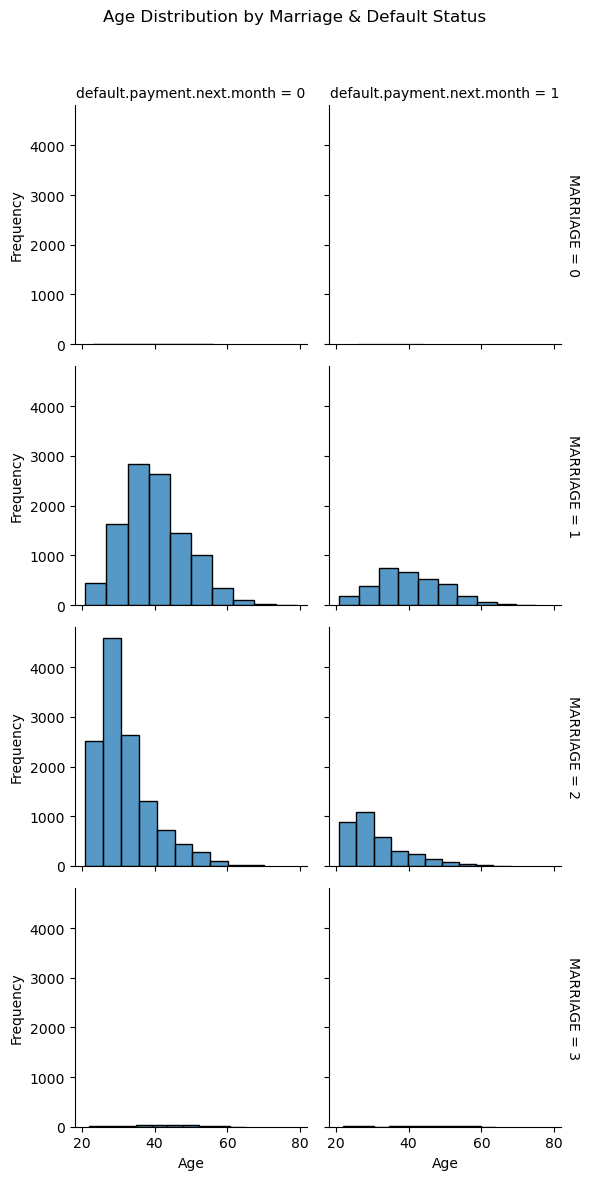

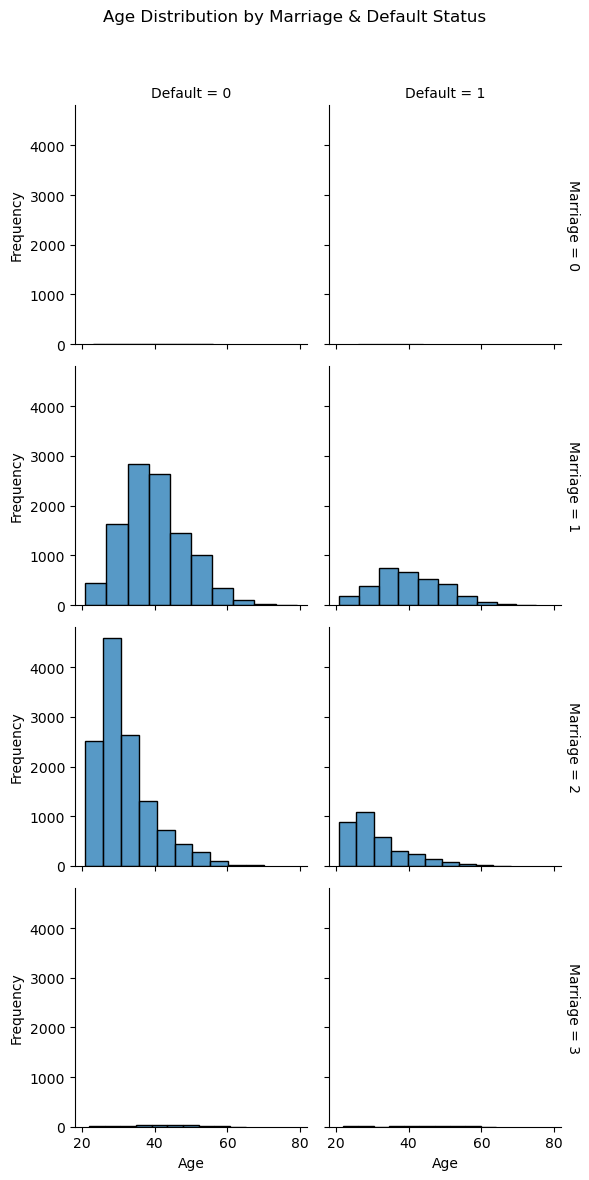

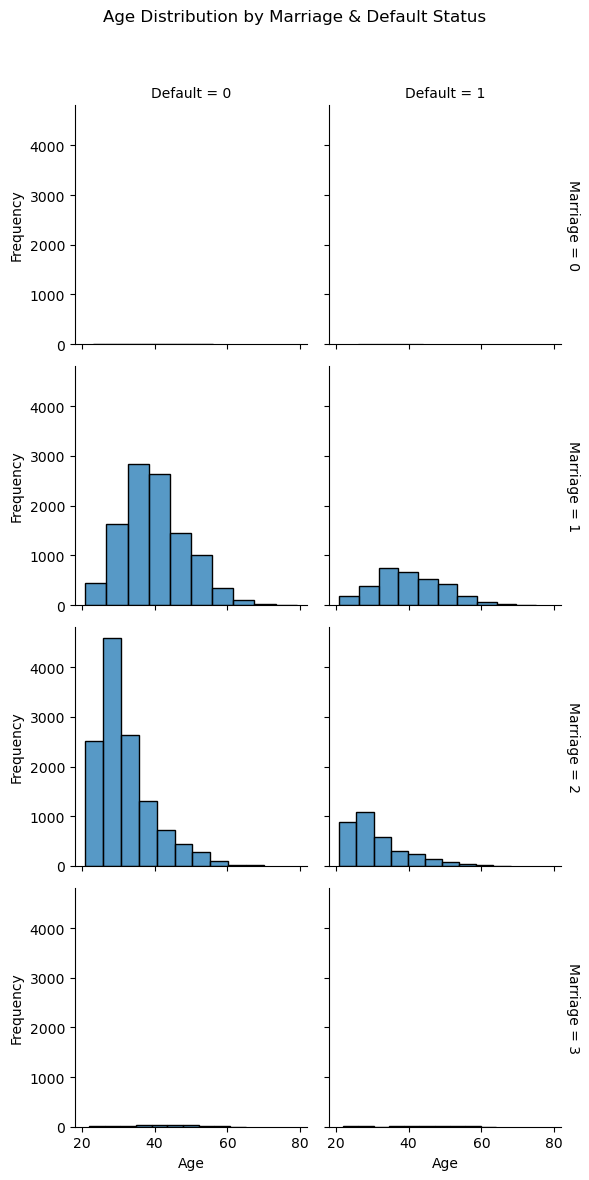

In [22]:
data = data.rename(columns={
    'AGE': 'Age',
    'MARRIAGE': 'Marriage',
    'default.payment.next.month': 'Default'
})

# Create FacetGrid
g = sns.FacetGrid(data, row="Marriage", col="Default", margin_titles=True)
g.map_dataframe(sns.histplot, x="Age", bins=10, kde=False)

# Add axis labels and title
g.set_axis_labels("Age", "Frequency")
g.fig.subplots_adjust(top=0.9)  # leave space for title
g.fig.suptitle("Age Distribution by Marriage & Default Status")

plt.show()

Observations: 
1. Among the married customers, defaulters are clustered around 30s to 40s.
2. Among the single customers, defaulters are clustered around 20s to 30s.

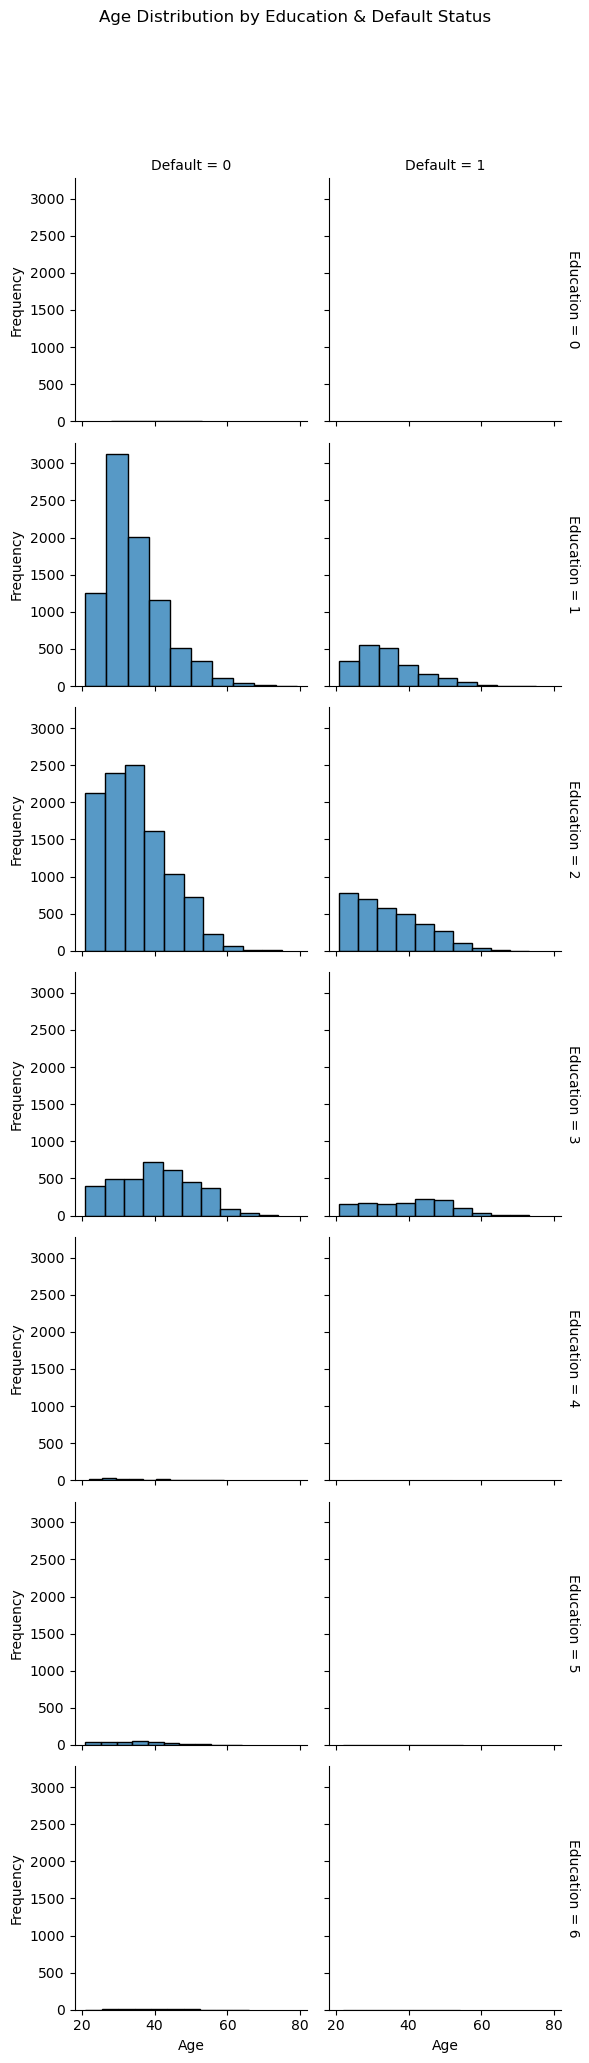

In [23]:
data = data.rename(columns={
    'EDUCATION': 'Education',
})


# Create FacetGrid
g = sns.FacetGrid(data, row="Education", col="Default", margin_titles=True)
g.map_dataframe(sns.histplot, x="Age", bins=10, kde=False)

# Add axis labels and title
g.set_axis_labels("Age", "Frequency")
g.fig.subplots_adjust(top=0.9)  # leave space for title
g.fig.suptitle("Age Distribution by Education & Default Status")

plt.show()

Observations: 
1. Among the graduate school customers, defaulters are clustered around 30s to 40s.
2. Among the university customers, defaulters are are usually concentrated in the 20s, with an obvious decreasing trend as the age increases.

**QUESTION 2**

In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Train.csv")

# Check first 5 rows
print("First 5 rows of the dataset:")
display(data.head())

# Check shape
print("\nShape of dataset (rows, columns):", data.shape)

First 5 rows of the dataset:


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   2     120000    2          2         2   26     -1      2      0      0   
1   4      50000    2          2         1   37      0      0      0      0   
2   5      50000    1          2         1   57     -1      0     -1      0   
3   6      50000    1          1         2   37      0      0      0      0   
4   7     500000    1          1         2   29      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
1  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
2  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
3  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
4  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0    1000.0       0.0    2000.0        1  
1    1100.0    1069.0    1000.0        0  
2    9000.0     689.0     679.0        0  
3    1000.0    1000.0     800.0        0  
4   20239.0   13750.0   13770.0        0  

[5 rows x 25 columns]


Shape of dataset (rows, columns): (26000, 25)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = pd.read_csv("Train.csv")

# --- STEP 1: Split into features (X) and target (y) ---
X = data.drop(columns=["Default"])
y = data["Default"]

# --- STEP 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- STEP 3: Logistic Regression with class_weight="balanced" ---
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

# --- STEP 4: Predictions & Evaluation ---
y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2819 1230]
 [ 432  719]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4049
           1       0.37      0.62      0.46      1151

    accuracy                           0.68      5200
   macro avg       0.62      0.66      0.62      5200
weighted avg       0.76      0.68      0.70      5200



Based on the above data exploration, we noted that BILL_4, BILL_5 and BILL_6 are highly correlated, hence using all three data points may cause multicollinearity. 
I have removed BILL_5 and BILL_6 and then ran the logistic regression model again.  

In [29]:
# Load dataset
data = pd.read_csv("Train.csv")

# --- STEP 1: Drop PAY_5 and PAY_6 ---
data = data.drop(columns=["PAY_5", "PAY_6"])

# --- STEP 2: Split features & target ---
X = data.drop(columns=["Default"])
y = data["Default"]

# --- STEP 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- STEP 4: Logistic Regression with balanced weights ---
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

# --- STEP 5: Predictions & Evaluation ---
y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2911 1138]
 [ 424  727]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4049
           1       0.39      0.63      0.48      1151

    accuracy                           0.70      5200
   macro avg       0.63      0.68      0.64      5200
weighted avg       0.77      0.70      0.72      5200



In [30]:
# Load the dataset
test_data = pd.read_csv("Test.csv")

# Preview the first few rows
print("First 5 rows of Test dataset:")
display(test_data.head())

# Check dataset shape
print("\nShape of Test dataset (rows, columns):", test_data.shape)

First 5 rows of Test dataset:


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   5170     140000    2          2         2   26      0      0      2   
1  22727      90000    2          1         2   31      1     -2     -2   
2   4884     150000    2          1         2   32      2      2      2   
3   7142      30000    2          2         2   21     -2     -2     -2   
4  19043      70000    2          2         2   23      2      2      2   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...     125046    46364.0      83460    125000       6.0    4578.0   
1     -2  ...          0        0.0          0         0       0.0       0.0   
2      0  ...     123954   131543.0     134319      6000    3000.0    4600.0   
3     -2  ...       4311     1551.0          0       780    3260.0    4311.0   
4      0  ...      18013    19315.0      19859      2850       0.0    1400.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0    1427.0   87179.0   26291.0        1  
1       0.0       0.0       0.0        0  
2    9800.0    5100.0    5000.0        1  
3    1551.0       0.0       0.0        0  
4    1600.0    1000.0       0.0        1  

[5 rows x 25 columns]


Shape of Test dataset (rows, columns): (4000, 25)


In [32]:
# --- STEP 1: Load Test dataset ---
test_data = pd.read_csv("Test.csv")

# --- STEP 2: Drop PAY_5 and PAY_6 to match training ---
test_data = test_data.drop(columns=["PAY_5", "PAY_6"])

# --- STEP 3: Split into features & target ---
X_test = test_data.drop(columns=["Default"])
y_test = test_data["Default"]

# --- STEP 4: Predict using the trained logistic regression model ---
y_pred = log_reg.predict(X_test)

# --- STEP 5: Evaluate performance ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2233  885]
 [ 329  553]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      3118
           1       0.38      0.63      0.48       882

    accuracy                           0.70      4000
   macro avg       0.63      0.67      0.63      4000
weighted avg       0.76      0.70      0.72      4000



1. Accuracy
Accuracy = 70%
→ Out of 4000 test cases, about 2800 were correctly predicted.
→ This seems decent, but since the dataset is imbalanced (many more class 0 than class 1), accuracy alone is misleading.

2. Precision
Class 0 (precision = 0.87) → When the model predicts 0, it’s correct 87% of the time.
Class 1 (precision = 0.38) → When the model predicts 1, it’s only correct 38% of the time.
→ Means the model produces a lot of false positives for class 1.

3. F1 Score
Class 0: 0.79 → Strong balance of precision & recall.
Class 1: 0.48 → Much weaker, meaning the model struggles with minority class.

**QUESTOIN 3**

In [33]:
# --- STEP 1: Load Train dataset ---
data = pd.read_csv("Train.csv")

# --- STEP 2: Drop PAY_5 and PAY_6 (since you did that earlier for logistic regression) ---
data = data.drop(columns=["PAY_5", "PAY_6"])

# --- STEP 3: Split features & target ---
X = data.drop(columns=["Default"])
y = data["Default"]

# --- STEP 4: Train-test split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- STEP 5: Random Forest model ---
rf_model = RandomForestClassifier(
    random_state=1,
    n_estimators=500,
    max_depth=3,
    max_features=3
)

rf_model.fit(X_train, y_train)

# --- STEP 6: Predictions & Evaluation ---
y_pred = rf_model.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[3966   83]
 [ 931  220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4049
           1       0.73      0.19      0.30      1151

    accuracy                           0.81      5200
   macro avg       0.77      0.59      0.59      5200
weighted avg       0.79      0.81      0.76      5200



1. Confusion matrix
True Negatives (TN) = 3966 → Correctly predicted class 0.
False Positives (FP) = 83 → Incorrectly predicted 1 when it was 0.
False Negatives (FN) = 931 → Incorrectly predicted 0 when it was 1.
True Positives (TP) = 220 → Correctly predicted class 1.

Interpretation:
The model is excellent at recognizing class 0 (majority class).
It misses a large portion of class 1 (minority class) — many false negatives.

2. Accuracy = 81%

Better than logistic regression (70%), but again, accuracy is skewed by the majority class.

3. Precision, Recall, F1

Class 0
Precision = 0.81 → When it predicts 0, it’s correct 81% of the time.
Recall = 0.98 → Captures almost all true 0 cases.
F1 = 0.89 → Strong performance.

Class 1
Precision = 0.73 → When it predicts 1, it’s correct 73% of the time.
Recall = 0.19 → Very low — it only catches ~19% of true 1 cases.
F1 = 0.30 → Weak overall, because recall is so poor.

Comparison:
Random Forest: Higher accuracy, great at detecting class 0, but almost ignores class 1 (low recall).
Logistic Regression: Lower accuracy, but does a better job at finding class 1 (recall 63% vs 19%).

Conclusion:
If your goal is overall accuracy and correctly identifying class 0 → Random Forest wins.
If your goal is to catch as many class 1 cases as possible (important in credit default) → Logistic Regression is preferable despite lower accuracy.

**QUESTION 4**

In [35]:
from sklearn.svm import SVC

# --- STEP 1: Load Train dataset ---
data = pd.read_csv("Train.csv")

# --- STEP 2: Drop PAY_5 and PAY_6 (to stay consistent with earlier models) ---
data = data.drop(columns=["PAY_5", "PAY_6"])

# --- STEP 3: Split features & target ---
X = data.drop(columns=["Default"])
y = data["Default"]

# --- STEP 4: Train-test split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- STEP 5: Fit SVM with given parameters ---
svm_model = SVC(gamma=0.025, C=3, class_weight="balanced")  # class_weight helps with imbalance
svm_model.fit(X_train, y_train)

# --- STEP 6: Predictions & Evaluation ---
y_pred = svm_model.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[4049    0]
 [1150    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4049
           1       1.00      0.00      0.00      1151

    accuracy                           0.78      5200
   macro avg       0.89      0.50      0.44      5200
weighted avg       0.83      0.78      0.68      5200



Confusion Matrix:
[[4049    0]
 [1150    1]]

F1 score:
0 : 0.88
1 : 0.00

Accuracy:
0.78

**QUESTION 5**

In [36]:
# 1) Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 2) Load data
df = pd.read_csv("train.csv")

X = df.drop(columns=["Default"])
y = df["Default"].astype(int)

# 3) Split & (recommended) scale features for ANN
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc   = scaler.transform(X_val)

# 4) Build model: 16 (input) -> 8 -> 8 -> 1
model = Sequential([
    Dense(16, activation="relu", kernel_initializer="normal", input_shape=(X_train_sc.shape[1],)),
    Dense(8,  activation="relu", kernel_initializer="normal"),
    Dense(8,  activation="relu", kernel_initializer="normal"),
    Dense(1,  activation="sigmoid", kernel_initializer="normal")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# 5) Train: 100 epochs, batch size 15
history = model.fit(
    X_train_sc, y_train,
    validation_data=(X_val_sc, y_val),
    epochs=100,
    batch_size=15,
    verbose=1
)

# 6) Quick evaluation
y_pred = (model.predict(X_val_sc).ravel() >= 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=3))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617 (2.41 KB)

 Trainable params: 617 (2.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7871 - loss: 0.4846 - val_accuracy: 0.8135 - val_loss: 0.4495
Epoch 2/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8145 - loss: 0.4469 - val_accuracy: 0.8171 - val_loss: 0.4421
Epoch 3/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8182 - loss: 0.4423 - val_accuracy: 0.8179 - val_loss: 0.4406
Epoch 4/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8192 - loss: 0.4393 - val_accuracy: 0.8179 - val_loss: 0.4388
Epoch 5/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8201 - loss: 0.4358 - val_accuracy: 0.8198 - val_loss: 0.4337
Epoch 6/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8203 - loss: 0.4335 - val_accuracy: 0.8177 - val_loss: 0.4356
Epoch 7/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8212 - loss: 0.4318 - val_accuracy: 0.8202 - val_loss: 0.4341
Epoch 8/100
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8213 - loss: 0

Confusion Matrix:
 [[3866  183]
 [ 739  412]]

F1 score:
0 : 0.893
1 : 0.472

Accuracy:
0.823

In [ ]:
**QUESTION 6**

| Model               | Accuracy  | Precision (0) | Recall (0) | F1 (0)   | Precision (1) | Recall (1) | F1 (1)   |
| ------------------- | --------- | ------------- | ---------- | -------- | ------------- | ---------- | -------- |
| Logistic Regression | 0.700     | 0.87          | 0.72       | 0.79     | 0.38          | 0.63       | 0.48     |
| Random Forest       | 0.810     | 0.81          | 0.98       | 0.89     | 0.73          | 0.19       | 0.30     |
| SVM                 | 0.780     | 0.78          | 1.00       | 0.88     | 1.00          | 0.00       | 0.00     |
| ANN                 | **0.823** | **0.84**      | **0.96**   | **0.89** | **0.69**      | **0.36**   | **0.47** |


Observation: 
The ANN achieves the best balance:
Highest accuracy overall (82.3%).
Strong precision/recall/F1 for class 0.
Much better at detecting class 1 than Random Forest or SVM, while nearly matching Logistic Regression’s F1 for class 1.

Conclusion:
If your priority is overall accuracy and majority class (0): Random Forest or ANN work well.
If your priority is minority class detection (class 1): ANN and Logistic Regression clearly outperform — Random Forest and SVM almost ignore class 1.
Best trade-off: ANN — it achieves the highest accuracy (82%), strong majority class performance, and still detects a meaningful proportion of class 1 cases (F1 = 0.47 vs 0.48 for logistic regression, but with much higher accuracy).
                                                          